# Data Exploration and EDA

In [1]:
# Hardware configuration 
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-04-12 04:57:00.223788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 04:57:07.969564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16262781012906969650
 xla_global_id: -1]

In [2]:
# Importing Important libraries
import os
import sys
sys.path.append('/home/studio-lab-user/Krishi')
import tensorflow as tf
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Functions from Local Packages
from src.utils import get_path

In [4]:
# No. of Directories containing images (data) for training, testing & validation 
plant_dirs = list(os.listdir('/home/studio-lab-user/Krishi/data'))[1:]
plant_dirs

['Apple',
 'Bell Pepper',
 'Cherry',
 'Corn (Maize)',
 'Grape',
 'Peach',
 'Potato',
 'Strawberry',
 'Tomato']

In [5]:
# Image dimensionality and batch size
image_dim = (256, 256)
batch_size = 32
num_channels = 3
input_shape = (batch_size, image_dim[0], image_dim[1], num_channels)   # (32, 256, 256, 3)

## Training Dataset

In [6]:
train_dataset = {}
print('================ Images & Classes for Training ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    train_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Train'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_dim,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Training ================

>>> No. of Images & Classes in "Apple" directory
Found 7771 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 3901 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 3509 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 7316 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 7222 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 3566 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 5702 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 3598 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 18345 files

## Testing Dataset

In [7]:
test_dataset = {}
print('================ Images & Classes for Testing ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    test_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Test'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_dim,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Testing ================

>>> No. of Images & Classes in "Apple" directory
Found 196 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 98 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 89 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 184 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 182 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 90 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 144 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 91 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 462 files belonging to 1

## Validation Dataset

In [8]:
val_dataset = {}
print('================ Images & Classes for Validation ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    val_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Val'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_dim,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Validation ================

>>> No. of Images & Classes in "Apple" directory
Found 1747 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 877 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 788 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 1645 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 1623 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 801 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 1282 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 809 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 4123 files be

## No. of Clases in Each Plants Dataset

In [9]:
classes = {}
for plant in plant_dirs:
    print('>>> Classes in {} dataset :-'.format(plant))
    classes[plant] = []
    for num,cat in enumerate(train_dataset[plant].class_names, start = 1):
        classes[plant].append(cat)
        print(num, cat)
    print('\n')

>>> Classes in Apple dataset :-
1 Apple Scab
2 Black Rot
3 Cedar Apple Rust
4 Healthy


>>> Classes in Bell Pepper dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Cherry dataset :-
1 Healthy
2 Powdery Mildew


>>> Classes in Corn (Maize) dataset :-
1 Cercospora Leaf Spot
2 Common Rust 
3 Healthy
4 Northern Leaf Blight


>>> Classes in Grape dataset :-
1 Black Rot
2 Esca (Black Measles)
3 Healthy
4 Leaf Blight


>>> Classes in Peach dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Potato dataset :-
1 Early Blight
2 Healthy
3 Late Blight


>>> Classes in Strawberry dataset :-
1 Healthy
2 Leaf Scorch


>>> Classes in Tomato dataset :-
1 Bacterial Spot
2 Early Blight
3 Healthy
4 Late Blight
5 Leaf Mold
6 Mosaic Virus
7 Septoria Leaf Spot
8 Target Spot
9 Two-Spotted Spider Mite
10 Yellow Leaf Curl Virus




## Visualizing Sample Images

>>> Sample Images of "Apple" dataset


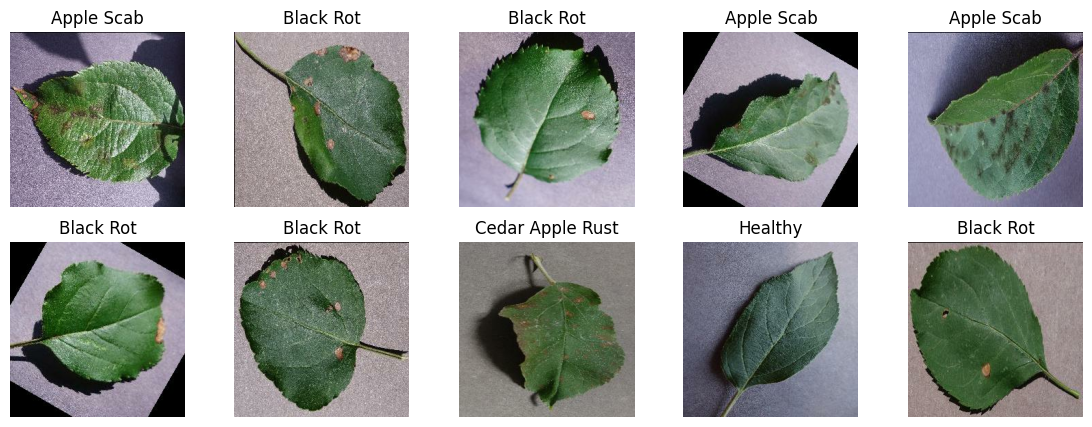



>>> Sample Images of "Bell Pepper" dataset


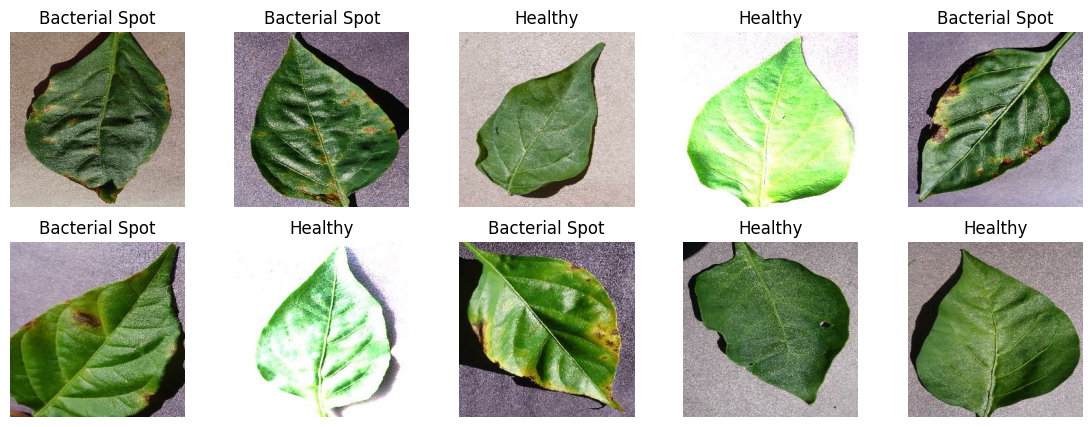



>>> Sample Images of "Cherry" dataset


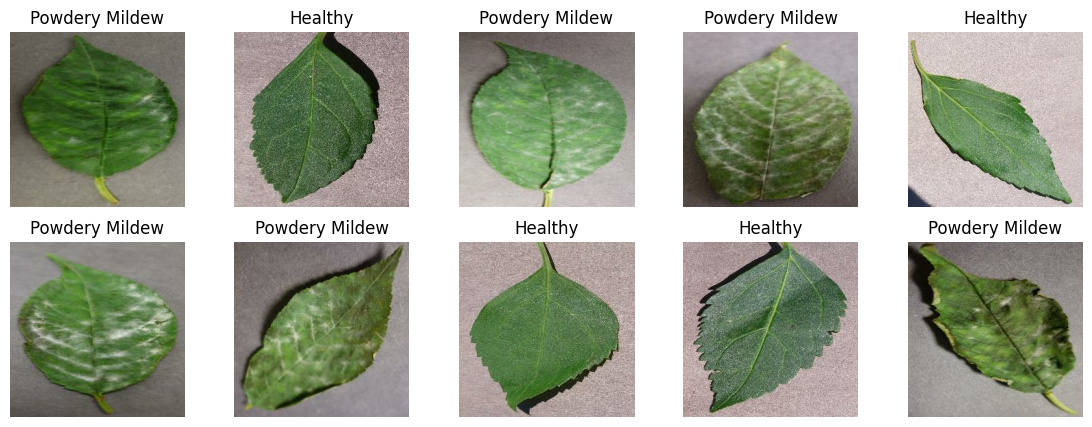



>>> Sample Images of "Corn (Maize)" dataset


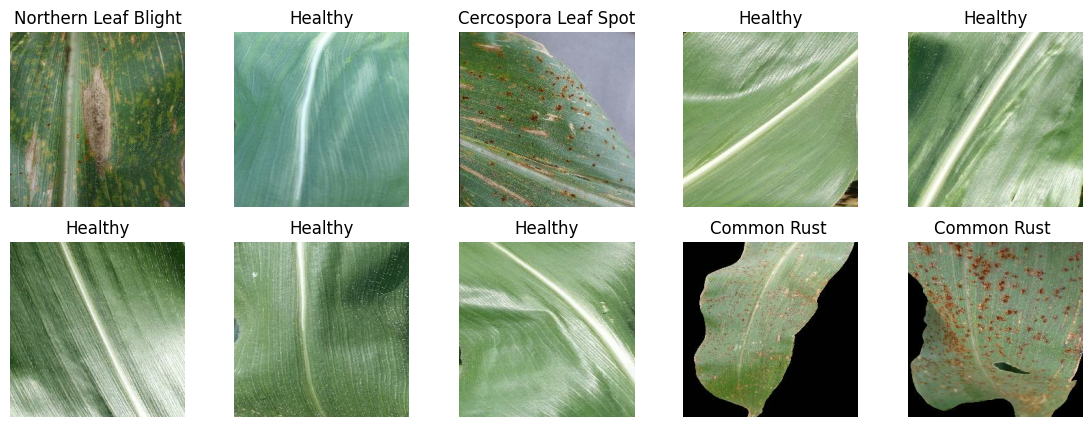



>>> Sample Images of "Grape" dataset


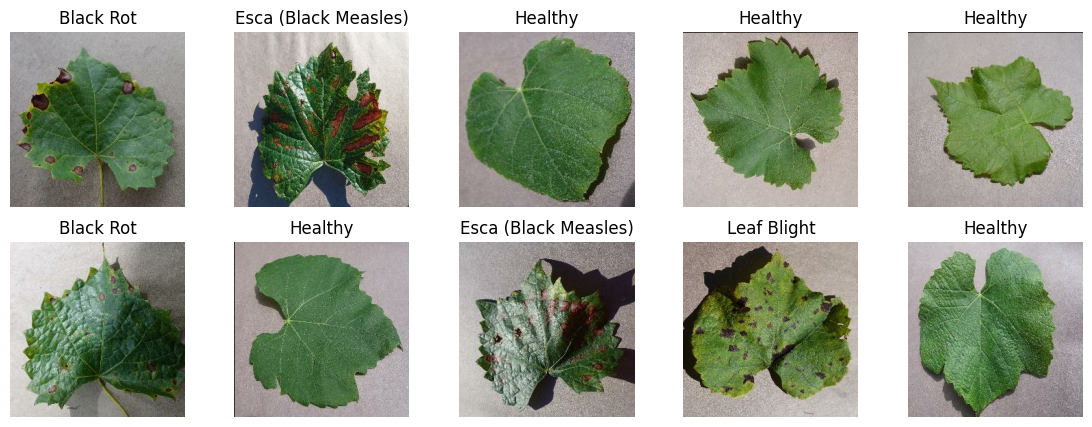



>>> Sample Images of "Peach" dataset


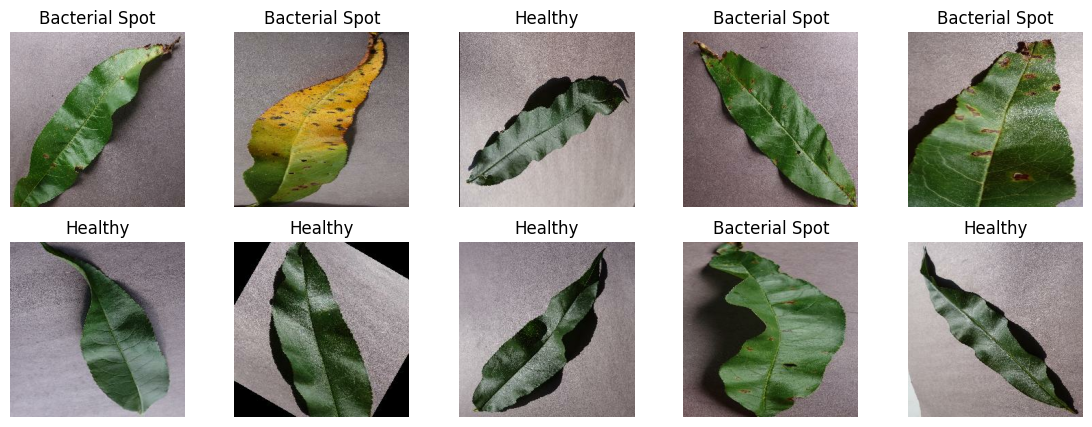



>>> Sample Images of "Potato" dataset


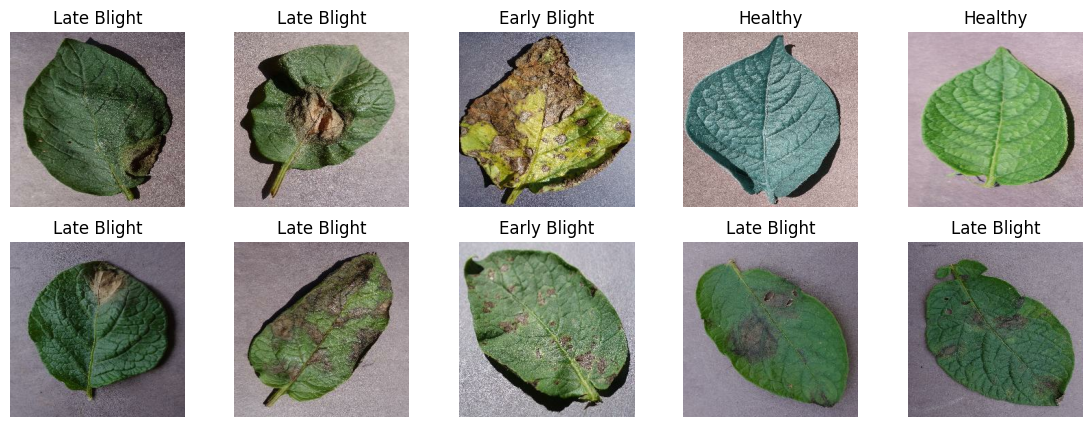



>>> Sample Images of "Strawberry" dataset


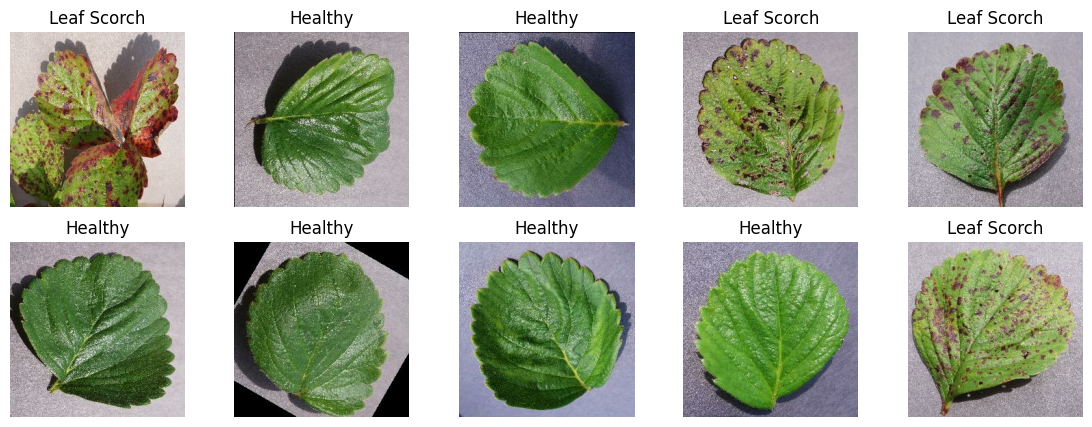



>>> Sample Images of "Tomato" dataset


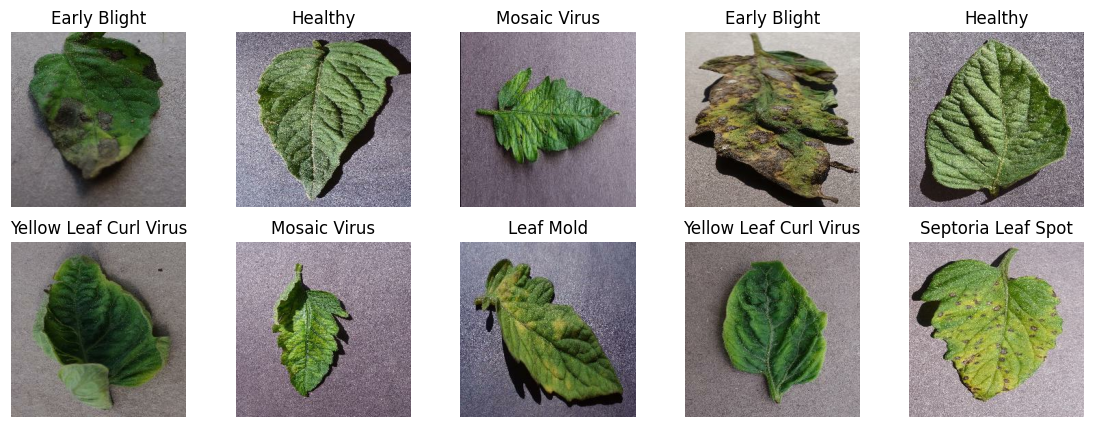

In [10]:
for plant in plant_dirs:
    print('>>> Sample Images of "{}" dataset'.format(plant))
    plt.figure(figsize = (14,5))
    for image_batch, image_label in train_dataset[plant].take(1):
        for i in range(10):
            plt.subplot(2,5,i+1)
            plt.imshow(image_batch[i].numpy().astype('uint8'))
            plt.title(classes[plant][image_label[i]])
            plt.axis('off')
        plt.show()    
    print('\n')

In [19]:
from tensorflow.data import AUTOTUNE
from keras.callbacks import TensorBoard, EarlyStopping
from keras import Sequential, layers, models
from keras.layers import Resizing, Rescaling
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.losses import SparseCategoricalCrossentropy

### Cache, Shuffle and Prefetch Dataset

In [12]:
for plant in plant_dirs:    
    train_dataset[plant] = train_dataset[plant].cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
    test_dataset[plant] = test_dataset[plant].cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
    val_dataset[plant] = val_dataset[plant].cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [13]:
resize_rescale_layer = Sequential([
    Resizing(image_dim[0],
             image_dim[0]),
    Rescaling(1.0/255)
])

In [14]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=3,
                               restore_best_weights=True)

In [15]:
def Model(plant:str, classes:dict):
    
    n_classes = len(classes[f'{plant}'])

    model = models.Sequential([
        resize_rescale_layer,
        Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64,  kernel_size = (3,3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64,  kernel_size = (3,3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(n_classes, activation='softmax'),
    ], name = f'{plant}_Model')

    model.build(input_shape=input_shape)
    
    return model

In [16]:
mode = Model('Peach', classes)

In [17]:
mode.summary()

Model: "Peach_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)          

In [20]:
mode.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = mode.fit(
    train_dataset['Peach'],
    batch_size=batch_size,
    validation_data=test_dataset['Peach'],
    verbose=1,
    epochs=50,
    callbacks=[early_stopping])

Epoch 1/50
112/112 [==============================] - 254s 2s/step - loss: 0.3036 - accuracy: 0.8674 - val_loss: 0.0998 - val_accuracy: 0.9444
Epoch 2/50
112/112 [==============================] - 277s 2s/step - loss: 0.1185 - accuracy: 0.9543 - val_loss: 0.0523 - val_accuracy: 0.9667
Epoch 3/50
112/112 [==============================] - 258s 2s/step - loss: 0.0982 - accuracy: 0.9633 - val_loss: 0.0510 - val_accuracy: 0.9778
Epoch 4/50
112/112 [==============================] - 257s 2s/step - loss: 0.0921 - accuracy: 0.9714 - val_loss: 0.1559 - val_accuracy: 0.9556
Epoch 5/50
 89/112 [======================>.......] - ETA: 51s - loss: 0.0771 - accuracy: 0.9756